In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [8]:
def load_mnist_dataset():
    (train_validation_images, train_validation_labels), (test_images, test_labels) = mnist.load_data()
    
    train_validation_images = train_validation_images.reshape(-1, 28, 28, 1)
    test_images = test_images.reshape(-1, 28, 28, 1)
    #reshape(데이터개수, 가로픽셀수, 세로픽셀수, 채널)
    #reshape에서 데이터개수가 -1이면 현재 데이터의 개수 그대로 사용
    #채널의 경우 흑백이라 1, 컬러 사진이라면(RGB) 3채널
    
    train_validation_images = train_validation_images / 255.
    test_images = test_images / 255.
    #normalization (정규화)
    #실제 픽셀에 들어있는 값이 0 ~ 255이므로 255로 나누어 1이하가 되도록 normalization
    
    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    #80% train data / 20% validation data
    n_train = int(n_train_validation * train_ratio)
    
    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels
    
    print('Train Set')
    print('Image : ', train_x.shape)
    print('Label : ', train_y.shape)
    print('Validation Set')
    print('Image : ', validation_x.shape)
    print('Label : ', validation_y.shape)
    print('Train & Validation Set')
    print('Image : ', test_x.shape)
    print('Label : ', test_y.shape)

    return train_x, train_y, validation_x, validation_y, test_x, test_y

In [9]:
train_x, train_y, validation_x, validation_y, test_x, test_y = load_mnist_dataset()

Train Set
Image :  (48000, 28, 28, 1)
Label :  (48000,)
Validation Set
Image :  (12000, 28, 28, 1)
Label :  (12000,)
Train & Validation Set
Image :  (10000, 28, 28, 1)
Label :  (10000,)


In [12]:
#Deep CNN Model
#5개의 Convolution Layer & 2개의 FC Layer
model = Sequential()
model.add(Conv2D(filters = 24, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 36, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 48, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 60, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 72, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [13]:
x = tf.random.uniform(shape = (1, 28, 28, 1))
for layer in model.layers:
    x = layer(x)
    print(layer.__class__.__name__, 'output shape : \t', x.shape)

Conv2D output shape : 	 (1, 28, 28, 24)
BatchNormalization output shape : 	 (1, 28, 28, 24)
Conv2D output shape : 	 (1, 28, 28, 36)
BatchNormalization output shape : 	 (1, 28, 28, 36)
Conv2D output shape : 	 (1, 28, 28, 48)
BatchNormalization output shape : 	 (1, 28, 28, 48)
MaxPooling2D output shape : 	 (1, 14, 14, 48)
Conv2D output shape : 	 (1, 14, 14, 60)
MaxPooling2D output shape : 	 (1, 7, 7, 60)
Conv2D output shape : 	 (1, 7, 7, 72)
BatchNormalization output shape : 	 (1, 7, 7, 72)
MaxPooling2D output shape : 	 (1, 3, 3, 72)
Flatten output shape : 	 (1, 648)
Dense output shape : 	 (1, 128)
Dropout output shape : 	 (1, 128)
Dense output shape : 	 (1, 10)


In [14]:
history = model.fit(train_x, train_y, batch_size = 9, epochs = 10, verbose = 2, validation_data = (validation_x, validation_y))

Epoch 1/10
5334/5334 - 25s - loss: 0.2036 - accuracy: 0.9402 - val_loss: 0.0934 - val_accuracy: 0.9728 - 25s/epoch - 5ms/step
Epoch 2/10
5334/5334 - 21s - loss: 0.0917 - accuracy: 0.9748 - val_loss: 0.0521 - val_accuracy: 0.9868 - 21s/epoch - 4ms/step
Epoch 3/10
5334/5334 - 21s - loss: 0.0720 - accuracy: 0.9806 - val_loss: 0.0411 - val_accuracy: 0.9912 - 21s/epoch - 4ms/step
Epoch 4/10
5334/5334 - 21s - loss: 0.0571 - accuracy: 0.9846 - val_loss: 0.0397 - val_accuracy: 0.9882 - 21s/epoch - 4ms/step
Epoch 5/10
5334/5334 - 21s - loss: 0.0467 - accuracy: 0.9870 - val_loss: 0.0448 - val_accuracy: 0.9898 - 21s/epoch - 4ms/step
Epoch 6/10
5334/5334 - 21s - loss: 0.0443 - accuracy: 0.9882 - val_loss: 0.0805 - val_accuracy: 0.9844 - 21s/epoch - 4ms/step
Epoch 7/10
5334/5334 - 21s - loss: 0.0379 - accuracy: 0.9892 - val_loss: 0.0360 - val_accuracy: 0.9918 - 21s/epoch - 4ms/step
Epoch 8/10
5334/5334 - 21s - loss: 0.0349 - accuracy: 0.9900 - val_loss: 0.0410 - val_accuracy: 0.9912 - 21s/epoch - 4

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14524\3306111965.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


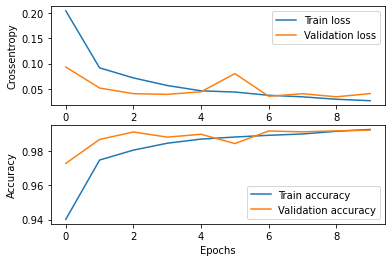

In [15]:
fig, axes = plt.subplots(2, 1)

axes[0].plot(history.history['loss'], label = 'Train loss')
axes[0].plot(history.history['val_loss'], label = 'Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label = 'Train accuracy')
axes[1].plot(history.history['val_accuracy'], label = 'Validation accuracy')
axes[1].legend()
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')

fig.show()

In [16]:
result = model.evaluate(test_x, test_y, verbose = 2)

print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1] * 100))

313/313 - 1s - loss: 0.0256 - accuracy: 0.9930 - 969ms/epoch - 3ms/step
Test loss : 0.0256	 Test accuracy : 99.30%


313/313 [==============================] - 1s 2ms/step
Probability is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


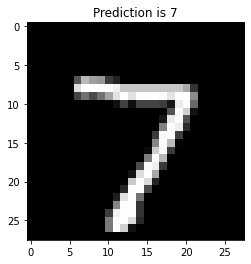

In [17]:
prediction = model.predict(test_x)
plt.imshow(test_x[0], 'gray')
print('Probability is {}'.format(prediction[0].round()))
plt.title('Prediction is {}'.format(np.argmax(prediction[0])))
plt.show()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 24)       96        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 36)        7812      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 36)       144       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 48)        15600     
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 48)       1